<a href="https://colab.research.google.com/github/BarnaliBhowmik/NeuroQuanta/blob/main/Hand_on_lab_Implementing_and_Training_a_Simple_RNN_for_Sine_Wave_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
    <img src="JHU.jpeg" width="200" alt="Johns Hopkins University logo">
</p>

# Hands On Lab: Implementing and Training a Simple RNN for Sine Wave Prediction
Estimated time needed: **60** minutes

### Lab Overview:

This hands-on lab demonstrates how to implement a simple RNN using PyTorch to predict the next value in a sine wave sequence. The sine wave serves as a simplified example of time-series data, allowing us to focus on understanding the mechanics of RNNs.
By the end of this lab, you will have a working RNN capable of learning and predicting a sine wave, as well as a deeper understanding of how RNNs process sequential data.

### Lab Objective:

By the end of this lab, you will be able to:

1. Understand the architecture and functionality of Recurrent Neural Networks (RNNs).
2. Learn how to generate a sine wave dataset and structure it for sequential learning.
3. Implement a custom RNN cell using PyTorch.
4. Train the RNN model to minimize prediction error on the sine wave data.
5. Visualize the model's predictions and compare them to the actual sine wave, evaluating its performance.

### Tools and Libraries Used:

1. **PyTorch:** For model implementation, training, and evaluation.
2. **NumPy:** For sine wave generation and numerical computations.
3. **Matplotlib:** For visualizing the sine wave and the RNN’s prediction


## Implementation:

### Step 1: Install Required Libraries

> **Note**: Please be patient while the required packages are being installed. This may take some time due to the multiple dependencies, but it should complete shortly.

In [1]:
!pip install torch numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

### Step 2: Dataset Preparation
**Task**:Generate a sine wave dataset, split it into sequences, and prepare it for the RNN.

In [2]:
import numpy as np
import torch

seq_length = 50
num_samples = 1000
x = np.linspace(0, 50, num_samples)
sine_wave = np.sin(x)
#create the sequence
#train the target
#write the code here!

def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length])
    return np.array(sequences), np.array(targets)

sequences, targets = create_sequences(sine_wave, seq_length)
train_size = int(len(sequences) * 0.8)
train_seq, test_seq = sequences[:train_size], sequences[train_size:]
train_targets, test_targets = targets[:train_size], targets[train_size:]

train_seq = torch.tensor(train_seq, dtype=torch.float32)
train_targets = torch.tensor(train_targets, dtype=torch.float32)
test_seq = torch.tensor(test_seq, dtype=torch.float32)
test_targets = torch.tensor(test_targets, dtype=torch.float32)








### Step 3: Implementing the RNN Model
**Task**:Define a simple RNN model with one hidden layer and an output layer.

In [3]:
import torch.nn as nn

class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(hidden_size, 1)
        self.tanh = nn.Tanh()
    # write the code here
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.tanh(self.i2h(combined))
        output = self.i2o(hidden)
        return output, hidden

    def init_hidden(self, batch_size):
        return torch.zeros(batch_size, self.hidden_size)






### Step 4: Training the Model
### Explanation
The code trains a Simple RNN using PyTorch for sequence prediction tasks. It processes input sequences step-by-step, computes loss using MSELoss, and optimizes model parameters with the Adam optimizer. The training loop runs for 100 epochs, initializing the hidden state at each epoch, accumulating loss over the sequence, and performing backpropagation. Progress is logged every 10 epochs, showing the model's learning performance.

**Task**:Train the RNN to minimize the error in predicting the sine wave sequence.

> **Note**: This block of code involves training an RNN for multiple epochs, with a sequence of data being processed step by step within each epoch. As the model iterates over each time step in the sequence, the computational cost increases, leading to longer processing times, especially with a larger number of epochs.

In [4]:
# Define input and model parameters
# Initialize the RNN model, loss function, and optimizer
# Logging every 10 epochs
# write the code here!


input_size = 1
hidden_size = 20
batch_size = train_seq.size(0)

model = SimpleRNN(input_size, hidden_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

num_epochs = 100
for epoch in range(num_epochs):
    hidden = model.init_hidden(batch_size)
    optimizer.zero_grad()
    loss = 0
    for t in range(seq_length):
        input = train_seq[:, t:t+1]
        target = train_targets[:, None]
        output, hidden = model(input, hidden)
        loss += criterion(output, target)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")



Epoch [10/100], Loss: 23.5632
Epoch [20/100], Loss: 23.4043
Epoch [30/100], Loss: 13.8283
Epoch [40/100], Loss: 10.5298
Epoch [50/100], Loss: 9.4380
Epoch [60/100], Loss: 9.1809
Epoch [70/100], Loss: 8.9705
Epoch [80/100], Loss: 8.8514
Epoch [90/100], Loss: 8.7348
Epoch [100/100], Loss: 8.5893


### Step 5: Training the Model
**Task**:Use the trained model to make predictions and compare them with the true sine wave.

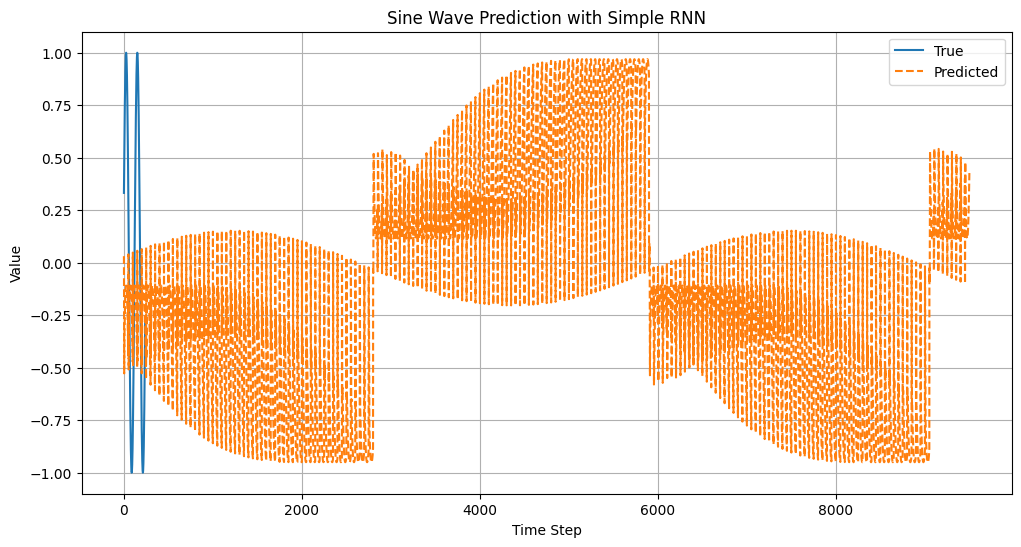

In [5]:
import matplotlib.pyplot as plt
#write the code here

model.eval()
test_hidden = model.init_hidden(test_seq.size(0))
predictions = []

with torch.no_grad():
    for t in range(test_seq.size(1)):
        input = test_seq[:, t:t+1]
        output, test_hidden = model(input, test_hidden)
        predictions.append(output.numpy())

predictions = np.array(predictions).squeeze().T

plt.figure(figsize=(12, 6))
plt.plot(sine_wave[len(train_seq):], label='True')
plt.plot(predictions.flatten(), label='Predicted', linestyle='dashed')
plt.legend()
plt.title('Sine Wave Prediction with Simple RNN')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.grid()
plt.show()




### Expected Output:

1. **Training Results:** The loss should decrease as the model learns the sine wave pattern.
2. **Visualization:** The predicted sine wave (dashed line) should closely match the true sine wave (solid line), indicating the model's success in generalizing the pattern.

### Conclusion:

In this lab, you successfully:

1. Built an RNN from scratch to handle sequential data.
2. Trained the model on a sine wave dataset and evaluated its performance.
3. Visualized the results to confirm the RNN's ability to predict sequential patterns.

### Lab Summary:

This lab explores the implementation and training of a simple Recurrent Neural Network (RNN) to predict the next value in a sine wave sequence. You will generate a sine wave dataset, preprocess it into sequential input-target pairs, and build an RNN using PyTorch. The RNN will be trained to minimize prediction error, leveraging its hidden states to capture temporal dependencies in the data. After training, the model's predictions will be evaluated and visualized against the actual sine wave to assess its performance. This lab provides foundational knowledge of RNNs and their application to time-series prediction tasks. Extensions include experimenting with LSTMs, GRUs, and hyperparameter tuning for improved results.
